### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras
    

### Import Dataset

In [4]:
from sklearn.datasets import fetch_california_housing


In [5]:
housing=fetch_california_housing()

In [12]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [14]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [13]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [11]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Training Dataset

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [18]:
X_train_full.shape

(15480, 8)

### Data Preprocessing

In [19]:
from sklearn.preprocessing import StandardScaler


In [21]:
scaler= StandardScaler()
X_train =scaler.fit_transform(X_train)
X_valid=scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [23]:
# to get random values from the dataset

np.random.seed(42)
tf.random.set_seed(42)

In [24]:
X_train.shape

(11610, 8)

### Model Layers

In [25]:
model= keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


### Model Compilation

In [27]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mae'])

c:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [28]:
model_history=model.fit(X_train,y_train,epochs=20,
                       validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7414 - val_mae: 0.6560
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6221 - val_mae: 0.5870
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5779 - val_mae: 0.5550
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5572 - val_mae: 0.5496
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.5305 - val_mae: 0.5319
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.5113 - val_mae: 0.5224
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4974 - val_mae: 0.5151
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [29]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3993 - mae: 0.4595


In [30]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.48535555601119995,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549983620643616,
  0.41116511821746826,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618005990982056,
  0.5398454070091248,
  0.5237293839454651,
  0.5112563967704773,
  0.5010153651237488,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.46360209584236145,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [0.7413728833198547,
  0.6220595836639404,
  0.5779173374176025,
  0.55718696117

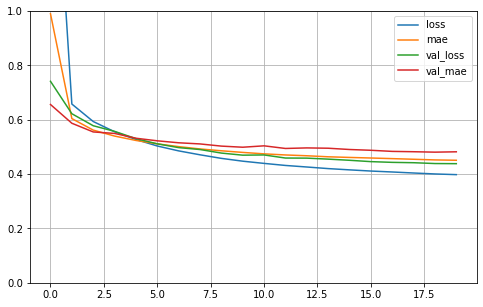

In [31]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
X_new=X_test[:3]

In [33]:
y_pred=model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 138ms/step
[[0.48965693]
 [1.9347274 ]
 [3.6413553 ]]


In [34]:
print(y_test[:3])

[0.477   0.458   5.00001]
